In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#twitter api req

consumer_key = 'OghYPlGodEcgozxuNVr5c5294'
consumer_secret = 'yHNzTz2WMoFvmMyUYPc5h2xqjn3Rjz1Ryc494gxf5SFwMzFG6F'
access_token = '2408033235-cChNchze46vnUMT97ECabw73MsCWAeUm7vrWslh'
access_token_secret = '3afWisufWn9u9LbMQu6v06XPbUak9DESRGnp3PF4xAZb0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#create api obj
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
#extract all tweets form the twitter user

posts = []
for tweet in tweepy.Cursor(api.user_timeline, screen_name="sapinker", ).items():
    posts.append(tweet)



In [14]:
i = 1
#print tweets
print("Show the tweets:\n")
for tweet in posts:
    print(str(i) + ")" + tweet.text+"\n")
    i += 1

Show the tweets:

1)Book giveaway - 80,000 Hours https://t.co/saJWDpUO3K

2)When I wrote Better Angels, I was surprised at the low % of vegetarians in polls (I was a victim of the Kael Effect… https://t.co/TDEWn7KMMn

3)RT @GaryMarcus: @NaveenGRao if you want to call it approximative intelligence i am fine with that. 

basically every time i give a talk i s…

4)Individuals are willing to invest in risky technology when it is necessary to mitigate climate change. Andrews, Del… https://t.co/5goIWCS7uY

5)People understand that geoengineering doesn't get us off the hook in mitigating climate change by reducing CO2 - bu… https://t.co/b5ksw1Tlh2

6)Stephen Fry explains a project to spread critical thinking and respectful discourse: https://t.co/IzgDS6gEFd via @YouTube

7)California launched a high-stakes plan to save its monarch butterflies. Scientists say it’s working https://t.co/zkpNdMsERt

8)Good poetry &amp; music @gavagai_series, a brainchild of @deblaublau, with a launch party for Da

In [15]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove  @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

    return text

df = pd.DataFrame([tweet.text for tweet in posts], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#print
df

,Tweets
0,"Book giveaway - 80,000 Hours"
1,"When I wrote Better Angels, I was surprised at..."
2,: if you want to call it approximative intell...
3,Individuals are willing to invest in risky tec...
4,People understand that geoengineering doesn't ...
...,...
3244,Why Plato matters:
3245,A comprehensive new overview of research findi...
3246,Cleaning up the US electricity grid is a garga...
3247,A Moral Philosophy 101 dilemma that will affec...


In [16]:
keywords = ['evo', 'evolution','ape', 'overproduction', 'adaption', 'organism', 'speciation', 'variation', 'metamorphosis', 'habitat', 'ecosystem', 'ancestor', 'taxonomy', 'taconomic', 'cell', 'inheritance', 'root', 'biology', 'Darwin', 'Natural Selection', 'Origin', 'botanic', 'cholorplast', 'classification', 'clone', 'mutation', 'isolation', 'cytoplasm', 'dna', 'ecology', 'embryo', 'eukaryotic', 'rna', 'fauna', 'flora', 'fetus', 'fossil', 'fungi', 'gene', 'genetic', 'genome', 'dinosour']
evoRTweets = []
i = 0

count = 0
for tweet in df['Tweets']:
    if any(keyword in tweet for keyword in keywords):
        evoRTweets.append(tweet)
        count+=1
    i+=1

dfEvo = pd.DataFrame([item for item in evoRTweets], columns=['Tweets'])

dfEvo


,Tweets
0,"Throughout the atomic age, the so-called nucle..."
1,Larry Summers and Alan Dershowitz join over 10...
2,The DALL-E 2 program impressively generates im...
3,: I wrote a quick post on that Science paper a...
4,She analyzes it as an interaction between the ...
...,...
247,Applying behavioral science to policy &amp; go...
248,An unusually deep and thorough report on our S...
249,Chronocentrism: Bigotry against ancestors and ...
250,"Speaking of which, data journalist Leah Libres..."


In [17]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#create two new colums
dfEvo['Subjectivity'] = dfEvo['Tweets'].apply(getSubjectivity)
dfEvo['Polarity'] = dfEvo['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
dfEvo


,Tweets,Subjectivity,Polarity
0,"Throughout the atomic age, the so-called nucle...",0.000000,0.000000
1,Larry Summers and Alan Dershowitz join over 10...,0.000000,0.000000
2,The DALL-E 2 program impressively generates im...,0.600000,0.600000
3,: I wrote a quick post on that Science paper a...,0.708333,0.097222
4,She analyzes it as an interaction between the ...,0.462626,0.212121
...,...,...,...
247,Applying behavioral science to policy &amp; go...,0.000000,-0.200000
248,An unusually deep and thorough report on our S...,0.400000,0.000000
249,Chronocentrism: Bigotry against ancestors and ...,0.500000,0.000000
250,"Speaking of which, data journalist Leah Libres...",0.700000,0.550000


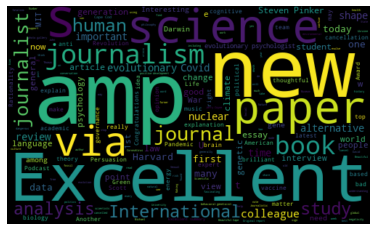

In [18]:
# plot the word cloud

allWords = ' '.join([twts for twts in dfEvo['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfEvo['Analysis'] = dfEvo['Polarity'].apply(getAnalysis)

#show dataframe
dfEvo

,Tweets,Subjectivity,Polarity,Analysis
0,"Throughout the atomic age, the so-called nucle...",0.000000,0.000000,Neutral
1,Larry Summers and Alan Dershowitz join over 10...,0.000000,0.000000,Neutral
2,The DALL-E 2 program impressively generates im...,0.600000,0.600000,Positive
3,: I wrote a quick post on that Science paper a...,0.708333,0.097222,Positive
4,She analyzes it as an interaction between the ...,0.462626,0.212121,Positive
...,...,...,...,...
247,Applying behavioral science to policy &amp; go...,0.000000,-0.200000,Negative
248,An unusually deep and thorough report on our S...,0.400000,0.000000,Neutral
249,Chronocentrism: Bigotry against ancestors and ...,0.500000,0.000000,Neutral
250,"Speaking of which, data journalist Leah Libres...",0.700000,0.550000,Positive


In [20]:
#get the percentage of positive tweets
ptweets = dfEvo[dfEvo.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / dfEvo.shape[0])* 100, 1) 

63.5

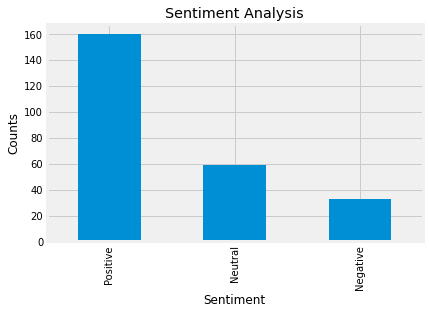

In [21]:
#show the value counts

dfEvo['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfEvo['Analysis'].value_counts().plot(kind='bar')
plt.show()